In [1]:
'''
Build a model to classify if given the data of a patient should tell if the patient is at risk of heart attack
'''

'\nBuild a model to classify if given the data of a patient should tell if the patient is at risk of heart attack\n'

In [2]:
'''age --> age
   sex --> 1 - M, 0 - F
   cp --> chest pain (0,1,2,3)
   -- Value 1: typical angina
   -- Value 2: atypical angina
   -- Value 3: non-anginal pain
   -- Value 4: asymptomatic
   trestbps --> When a patient is resting, what's his blood pressure
   chol --> cholestrol level
   fbs --> Blood sugar level when the person is fasting
        (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   restecg --> when a person is resting, what's his ecg
   -- Value 0: normal
   -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
   thalach --> Maximum heart rate achieved
   exang --> chest pain for the people who hit gym very often. 0 -. NO CP, 1 -> CP
   oldpeak --> these are values of crest and trough of ecg
   slope --> slope values of ecg
   ca --> Maximum no. of major blood vessels --> 0,1,2,3
   thal --> 0,1,2
           Genetic disorder
           0 --> no genetic disorder
           1 --> ganetic disorder(fixed effect)
           2 --> genetic disorder(reversible)
   target --> whether the person is having a heart disease or not
         0 --> The person is not having heart disease
         1 --> The person is having a heart disease '''

"age --> age\n   sex --> 1 - M, 0 - F\n   cp --> chest pain (0,1,2,3)\n   -- Value 1: typical angina\n   -- Value 2: atypical angina\n   -- Value 3: non-anginal pain\n   -- Value 4: asymptomatic\n   trestbps --> When a patient is resting, what's his blood pressure\n   chol --> cholestrol level\n   fbs --> Blood sugar level when the person is fasting\n        (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n   restecg --> when a person is resting, what's his ecg\n   -- Value 0: normal\n   -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n   -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\n   thalach --> Maximum heart rate achieved\n   exang --> chest pain for the people who hit gym very often. 0 -. NO CP, 1 -> CP\n   oldpeak --> these are values of crest and trough of ecg\n   slope --> slope values of ecg\n   ca --> Maximum no. of major blood vessels --> 0,1,2,3\n   thal --> 0,1,2

In [3]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading dataset

df=pd.read_csv(r"C:\Users\saura\Documents\INTELLIPAT\Projects\Heart disease\dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info() #All 303 features are in numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T #Average age of dataset is 55.

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.isnull().sum().sum() #No NULL values

0

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot: xlabel='thal', ylabel='count'>

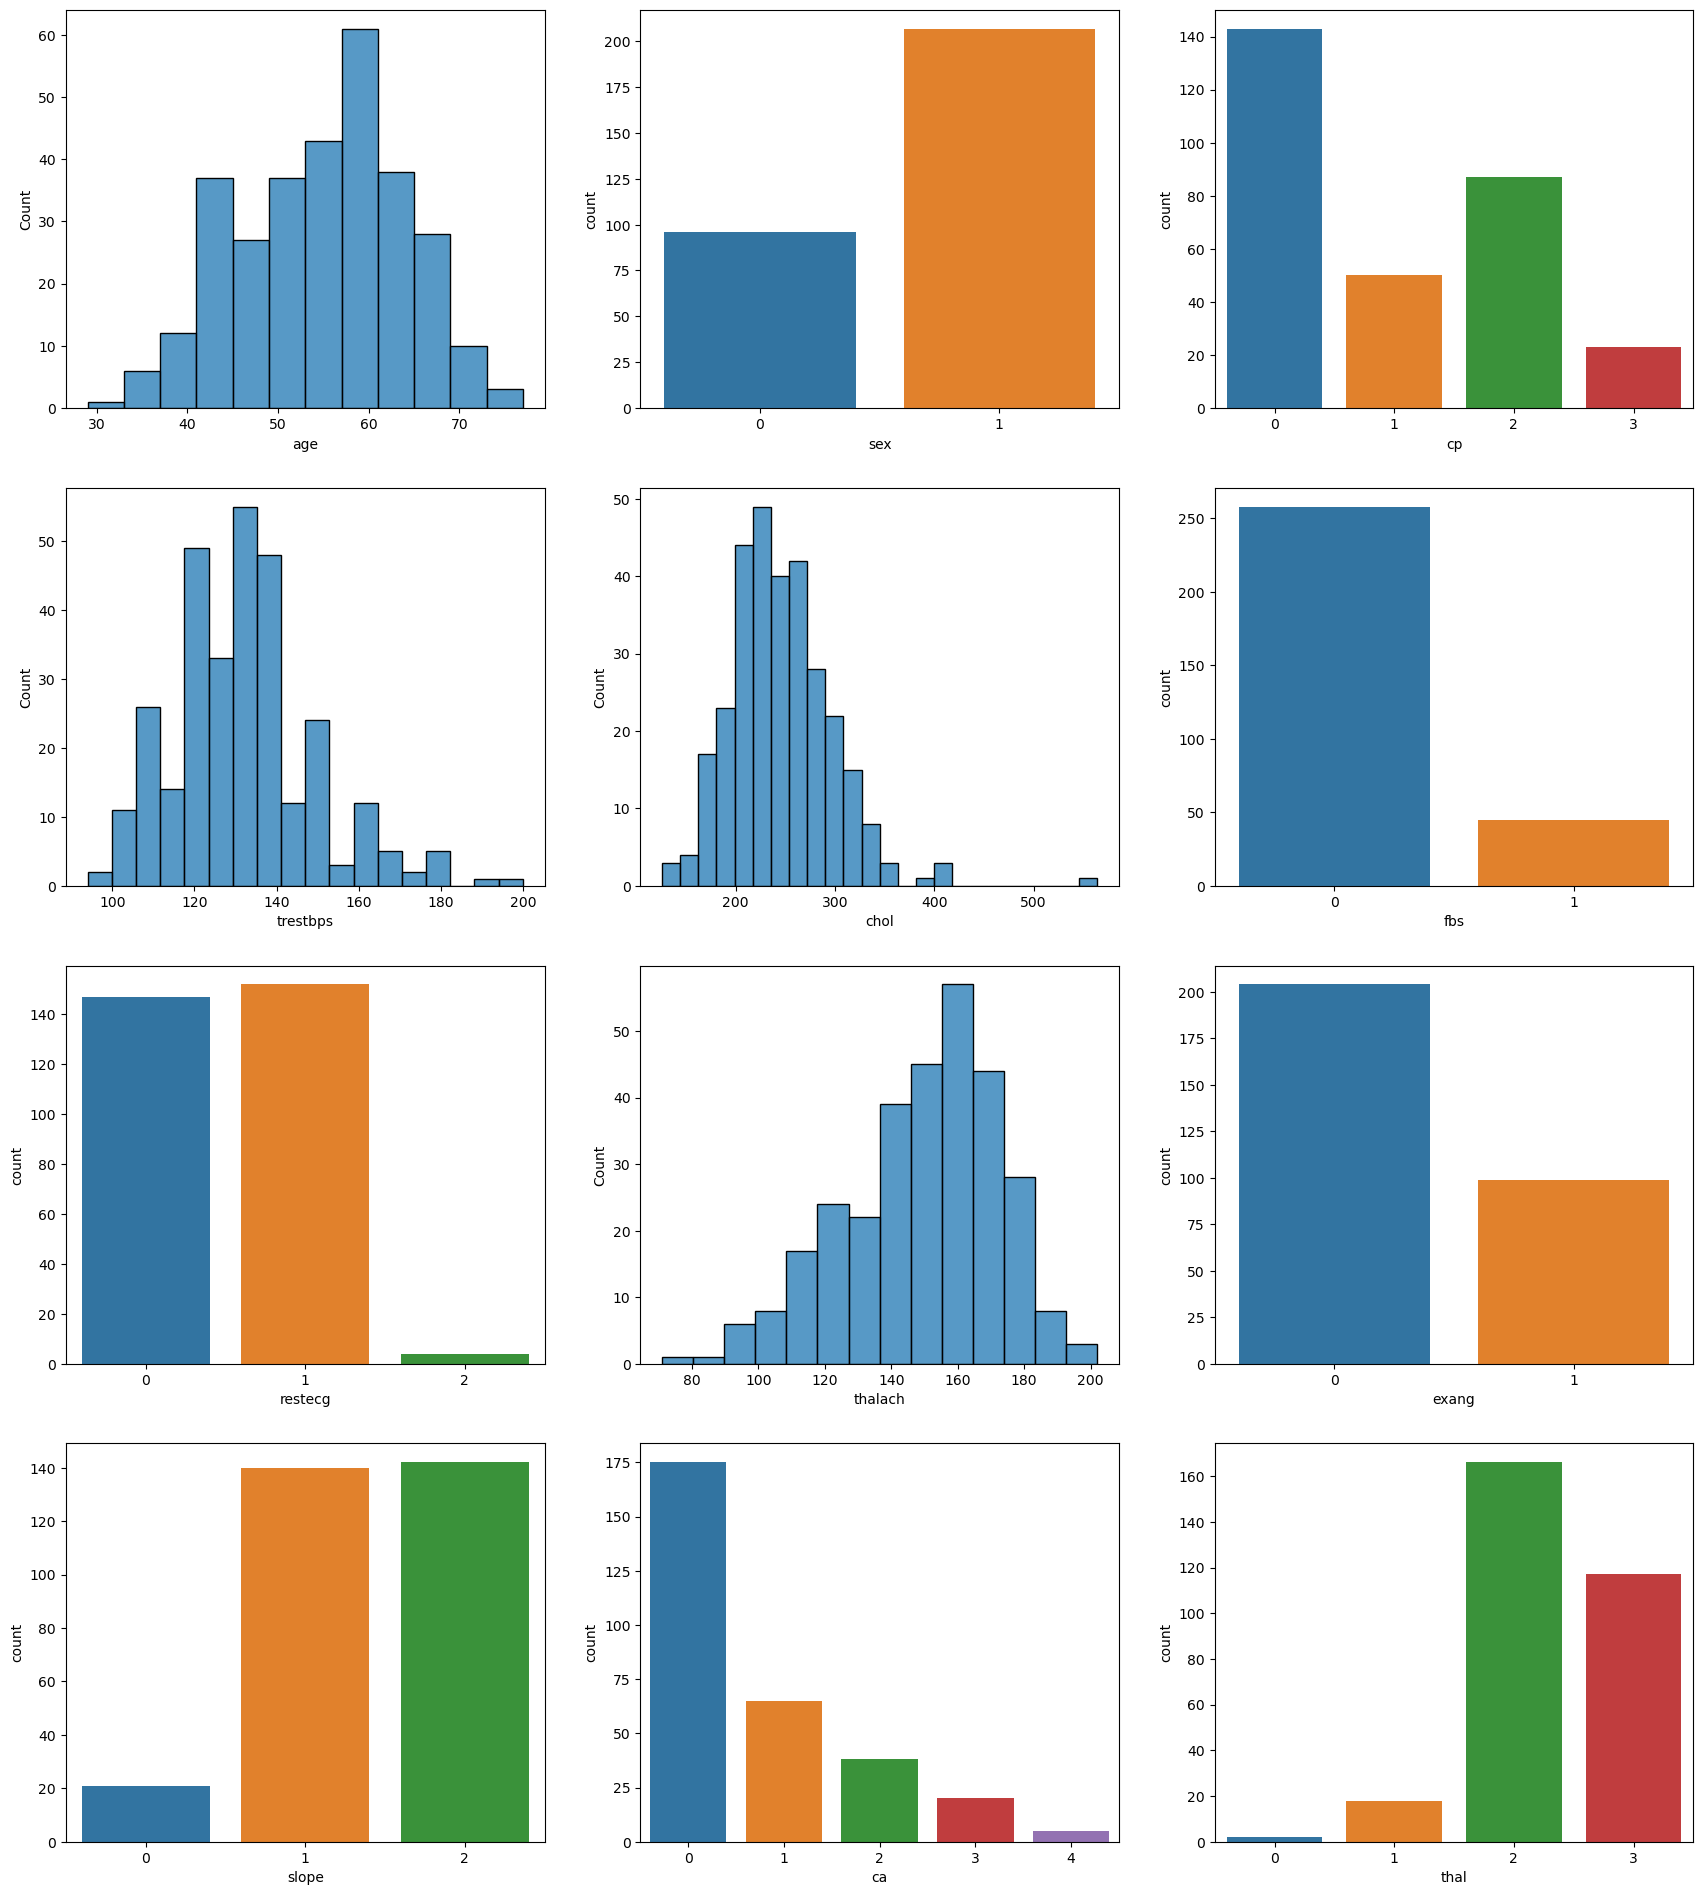

In [9]:
#Visualising data

plt.figure(figsize=(21,30))

plt.subplot(5,3,1)
sns.histplot(df,x=df['age']) #majority of them are in age bracket of 40-65.

plt.subplot(5,3,2)
sns.countplot(df,x=df['sex']) #Number of Men is double of women wrt heart disease. 

plt.subplot(5,3,3)
sns.countplot(df,x=df['cp']) #typical angina type of chest pain is most prevelant.

plt.subplot(5,3,4)
sns.histplot(df,x=df['trestbps']) #Resting blood pressure is in 120-140 range for majority of patients.

plt.subplot(5,3,5)
sns.histplot(df,x=df['chol']) #Cholestrol value ranges from 200-300.
 
plt.subplot(5,3,6)
sns.countplot(df,x=df['fbs']) #fasting blood sugar < 120 mg/dl for almost 90% of cases

plt.subplot(5,3,7)
sns.countplot(df,x=df['restecg']) #patients are almost equally divided in normal & ST-T wave abnormality ecg results 

plt.subplot(5,3,8)
sns.histplot(df,x=df['thalach']) # maximum heart rate achieved is in range of 140-180

plt.subplot(5,3,9)
sns.countplot(df,x=df['exang']) #Only one third of patients have exercise induced angina

plt.subplot(5,3,10)
sns.countplot(df,x=df['slope']) #roughly 6% have 0 slope ecg graph, rest are equally divided in 1 and 2

plt.subplot(5,3,11)
sns.countplot(df,x=df['ca']) #more than half have no major vessel colored by flourosopy

plt.subplot(5,3,12)
sns.countplot(df,x=df['thal']) #more than half of patients have genetic disorder(reversible)

In [10]:
df['target'].value_counts() #Target patients are fairly balanced.

1    165
0    138
Name: target, dtype: int64

**Heatmap analysis**

<AxesSubplot: >

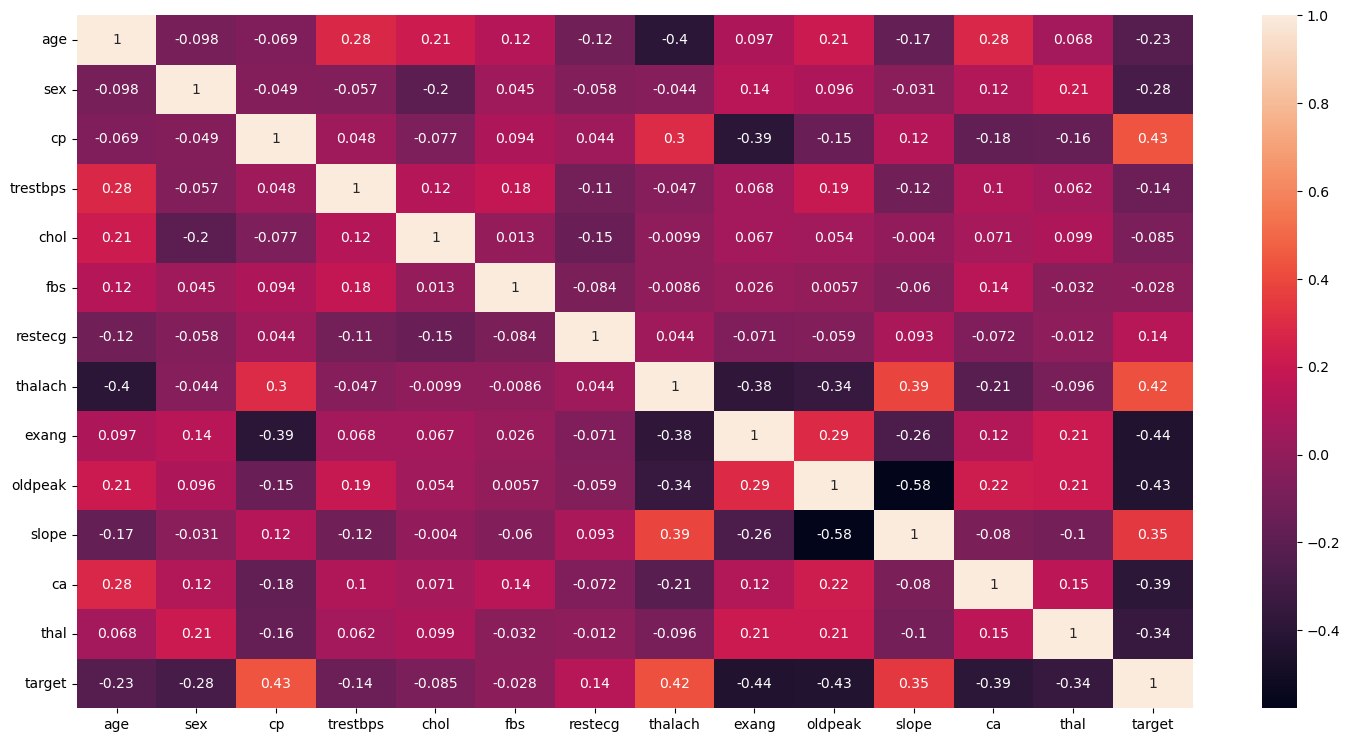

In [11]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True)

#Chol and fbs have least effect on target variable.

In [12]:
#Droping chol and fbs

df=df.drop(columns=['chol','fbs'],axis=1) 

In [13]:
#Independent and dependent features

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

print(x.shape)

(303, 11)


In [14]:
#Test train split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
#Standardisation

from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

x_train=scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [16]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR=LR.predict(x_test)

In [17]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_DT=DT.predict(x_test)

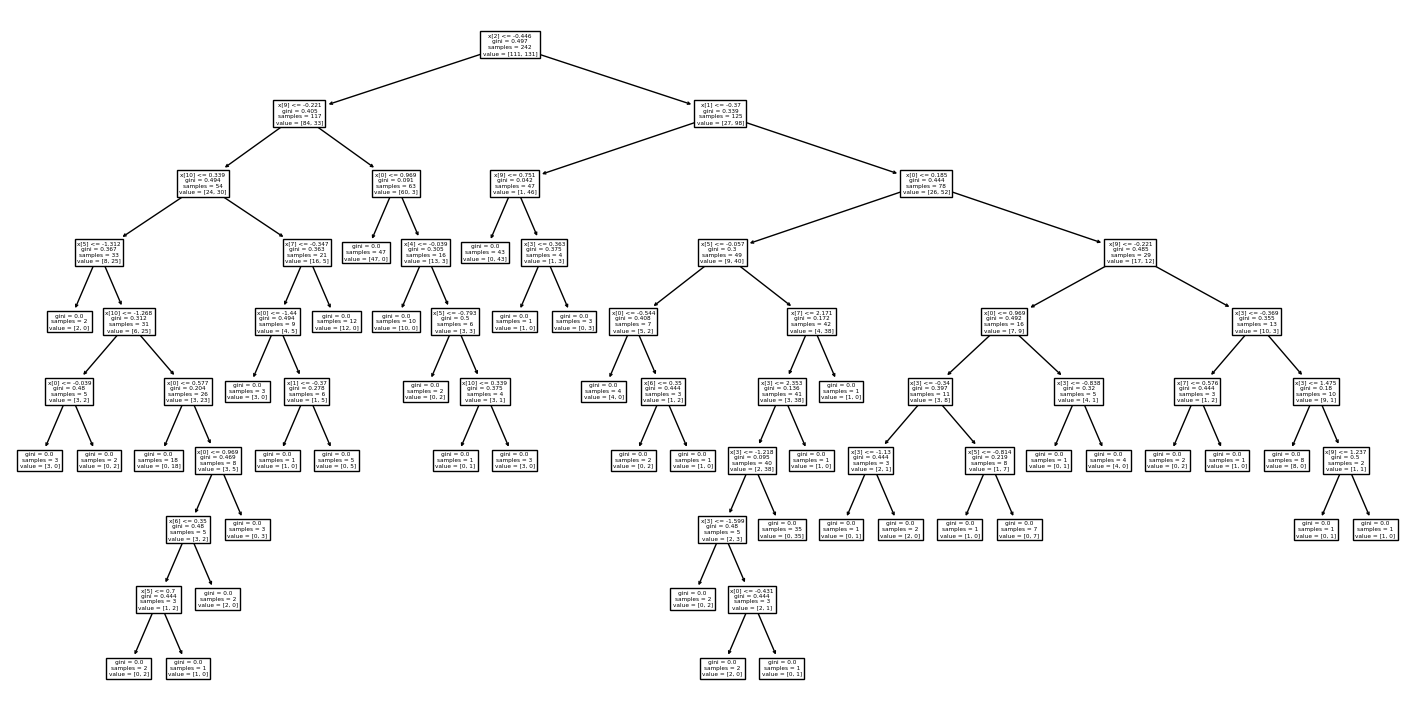

In [18]:
#Visualising Decision Tree

from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
plt.figure(figsize=(18,9))
tree.plot_tree(DT);

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
fn=['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang','oldpeak', 'slope', 'ca', 'thal']
cn=['1','0']

tree.export_graphviz(DT,out_file='tree.dot',feature_names = fn,class_names=cn,filled = True)

**Online Converter to Visualize your Decision Trees**

In [21]:
'''
https://dreampuf.github.io/GraphvizOnline/#digraph%20G%20%7B%0A%0A%20%20subgraph%20cluster_0%20%7B%0A%20%20%20%20style%3Dfilled%3B%0A%20%20%20%20color%3Dlightgrey%3B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%2Ccolor%3Dwhite%5D%3B%0A%20%20%20%20a0%20-%3E%20a1%20-%3E%20a2%20-%3E%20a3%3B%0A%20%20%20%20label%20%3D%20%22process%20%231%22%3B%0A%20%20%7D%0A%0A%20%20subgraph%20cluster_1%20%7B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%5D%3B%0A%20%20%20%20b0%20-%3E%20b1%20-%3E%20b2%20-%3E%20b3%3B%0A%20%20%20%20label%20%3D%20%22process%20%232%22%3B%0A%20%20%20%20color%3Dblue%0A%20%20%7D%0A%20%20start%20-%3E%20a0%3B%0A%20%20start%20-%3E%20b0%3B%0A%20%20a1%20-%3E%20b3%3B%0A%20%20b2%20-%3E%20a3%3B%0A%20%20a3%20-%3E%20a0%3B%0A%20%20a3%20-%3E%20end%3B%0A%20%20b3%20-%3E%20end%3B%0A%0A%20%20start%20%5Bshape%3DMdiamond%5D%3B%0A%20%20end%20%5Bshape%3DMsquare%5D%3B%0A%7D
'''

'\nhttps://dreampuf.github.io/GraphvizOnline/#digraph%20G%20%7B%0A%0A%20%20subgraph%20cluster_0%20%7B%0A%20%20%20%20style%3Dfilled%3B%0A%20%20%20%20color%3Dlightgrey%3B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%2Ccolor%3Dwhite%5D%3B%0A%20%20%20%20a0%20-%3E%20a1%20-%3E%20a2%20-%3E%20a3%3B%0A%20%20%20%20label%20%3D%20%22process%20%231%22%3B%0A%20%20%7D%0A%0A%20%20subgraph%20cluster_1%20%7B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%5D%3B%0A%20%20%20%20b0%20-%3E%20b1%20-%3E%20b2%20-%3E%20b3%3B%0A%20%20%20%20label%20%3D%20%22process%20%232%22%3B%0A%20%20%20%20color%3Dblue%0A%20%20%7D%0A%20%20start%20-%3E%20a0%3B%0A%20%20start%20-%3E%20b0%3B%0A%20%20a1%20-%3E%20b3%3B%0A%20%20b2%20-%3E%20a3%3B%0A%20%20a3%20-%3E%20a0%3B%0A%20%20a3%20-%3E%20end%3B%0A%20%20b3%20-%3E%20end%3B%0A%0A%20%20start%20%5Bshape%3DMdiamond%5D%3B%0A%20%20end%20%5Bshape%3DMsquare%5D%3B%0A%7D\n'

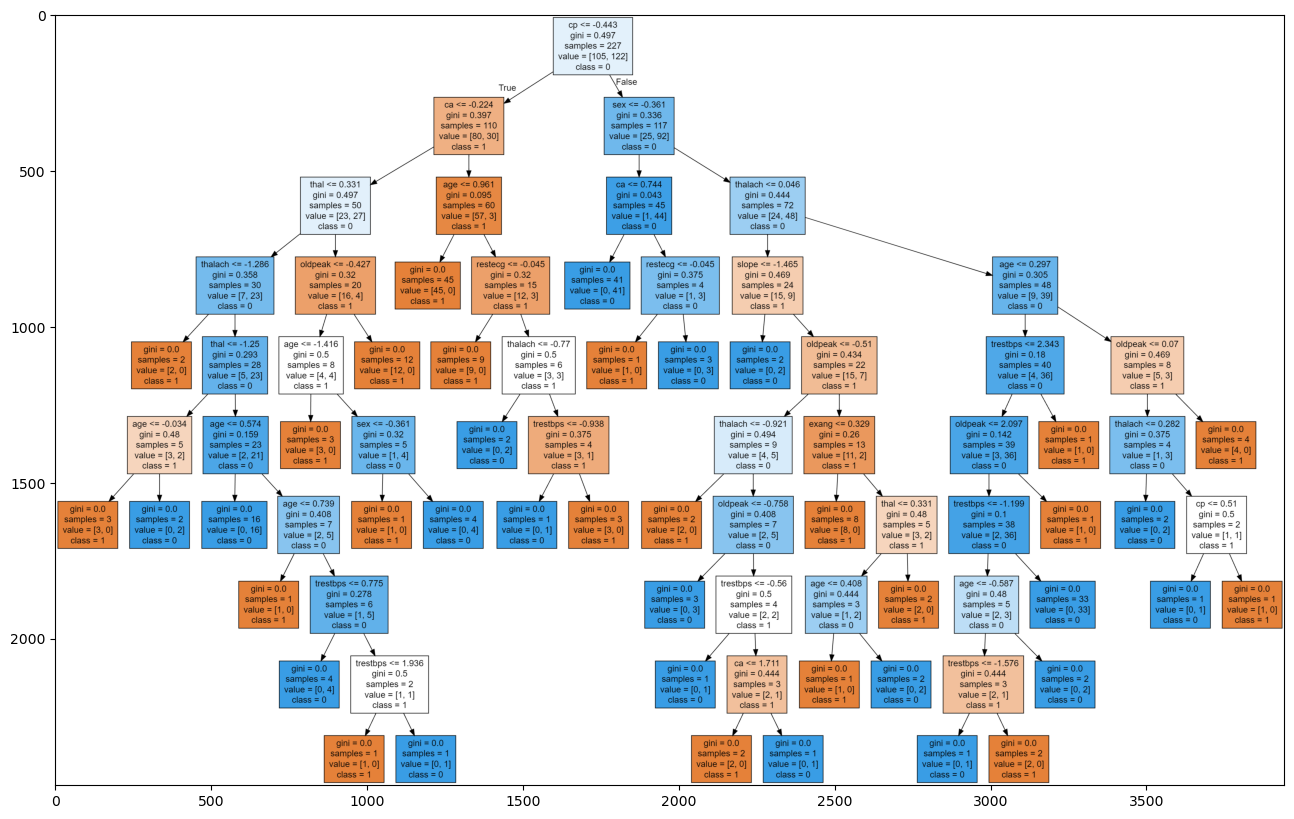

In [22]:
import matplotlib.image as mpimg
img1 = mpimg.imread(r"C:\Users\saura\Documents\INTELLIPAT\Projects\Heart disease\graphviz.png")
plt.figure(figsize=(20,10))
plt.imshow(img1)

In [23]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_RF=RF.predict(x_test)

In [24]:
#Accuracy metrics

from sklearn.metrics import *

<AxesSubplot: title={'center': 'Random Forest'}>

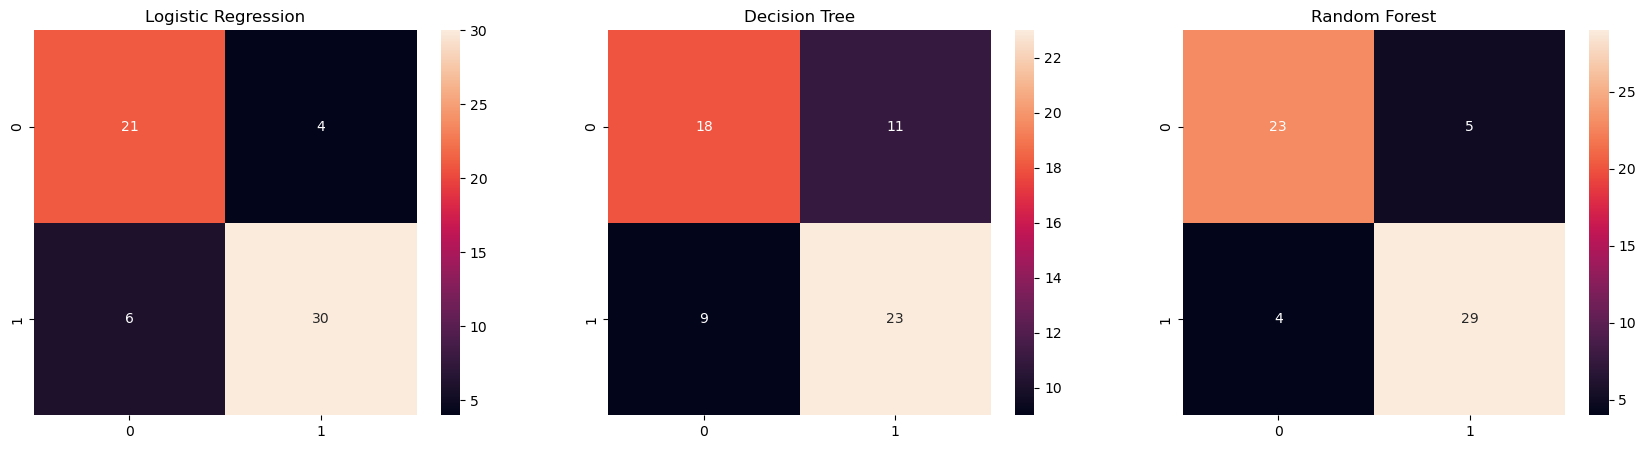

In [25]:
#Confusion matrix

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
plt.title('Logistic Regression')
sns.heatmap(confusion_matrix(y_pred_LR,y_test),annot=True)

plt.subplot(1,3,2)
plt.title('Decision Tree')
sns.heatmap(confusion_matrix(y_pred_DT,y_test),annot=True)

plt.subplot(1,3,3)
plt.title('Random Forest')
sns.heatmap(confusion_matrix(y_pred_RF,y_test),annot=True)

In [26]:
#Results

print('Accuracy of Logistic regression model :',round(accuracy_score(y_pred_LR,y_test)*100,2),'%')
print('Accuracy of Decision tree model :',round(accuracy_score(y_pred_DT,y_test)*100,2),'%')
print('Accuracy of Random forest model :',round(accuracy_score(y_pred_RF,y_test)*100,2),'%')

Accuracy of Logistic regression model : 83.61 %
Accuracy of Decision tree model : 67.21 %
Accuracy of Random forest model : 85.25 %


**Random Forest gives accuracy of 85%**